In [1]:
import uxarray as ux

import hvplot.pandas
import holoviews as hv

In [2]:
import datashader as ds
import datashader.transfer_functions as tf

In [3]:
help(ds.Canvas)

Help on class Canvas in module datashader.core:

class Canvas(builtins.object)
 |  Canvas(plot_width=600, plot_height=600, x_range=None, y_range=None, x_axis_type='linear', y_axis_type='linear')
 |  
 |  An abstract canvas representing the space in which to bin.
 |  
 |  Parameters
 |  ----------
 |  plot_width, plot_height : int, optional
 |      Width and height of the output aggregate in pixels.
 |  x_range, y_range : tuple, optional
 |      A tuple representing the bounds inclusive space ``[min, max]`` along
 |      the axis.
 |  x_axis_type, y_axis_type : str, optional
 |      The type of the axis. Valid options are ``'linear'`` [default], and
 |      ``'log'``.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, plot_width=600, plot_height=600, x_range=None, y_range=None, x_axis_type='linear', y_axis_type='linear')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  area(self, source, x, y, agg=None, axis=0, y_stack=None)
 |      Compute a reduction

In [4]:
help(ds.Canvas.polygons)

Help on function polygons in module datashader.core:

polygons(self, source, geometry, agg=None)
    Compute a reduction by pixel, mapping data to pixels as one or
    more filled polygons.
    
    Parameters
    ----------
    source : xarray.DataArray or Dataset
        The input datasource.
    geometry : str
        Column name of a PolygonsArray of the coordinates of each line.
    agg : Reduction, optional
        Reduction to compute. Default is ``any()``.
    
    Returns
    -------
    data : xarray.DataArray
    
    Examples
    --------
    >>> import datashader as ds  # doctest: +SKIP
    ... import datashader.transfer_functions as tf
    ... from spatialpandas.geometry import PolygonArray
    ... from spatialpandas import GeoDataFrame
    ... import pandas as pd
    ...
    ... polygons = PolygonArray([
    ...     # First Element
    ...     [[0, 0, 1, 0, 2, 2, -1, 4, 0, 0],  # Filled quadrilateral (CCW order)
    ...      [0.5, 1,  1, 2,  1.5, 1.5,  0.5, 1],     # Tri

In [5]:
base_path = "../../test/meshfiles/ugrid/outCSne30/"
grid_path = base_path + "outCSne30.ug"
data_path = base_path + "outCSne30_vortex.nc"
uxds = ux.open_dataset(grid_path, data_path)
uxds

<xarray.UxDataset>
Dimensions:  (ncol: 5400)
Dimensions without coordinates: ncol
Data variables:
    psi      (ncol) float64 1.351 1.331 1.31 1.289 ... 0.7121 0.6909 0.67 0.6495

In [6]:
out = uxds['psi'].plot()

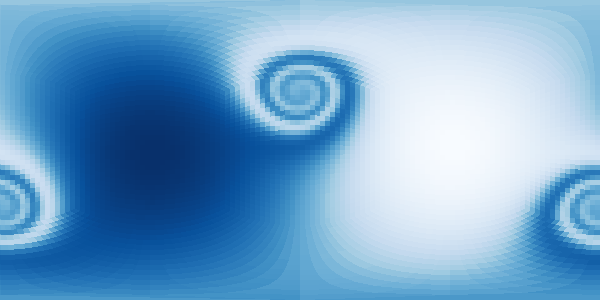

In [11]:
uxds['psi'].plot.raster(cmap="Blues", agg="mean")